<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Промежуточный-вывод:" data-toc-modified-id="Промежуточный-вывод:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Промежуточный вывод:</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

## Введение

В данном проекте требуется защитить данные клиентов страховой компании «Хоть потоп».

В нашем распоряжении набор данных, которые находится в файле /datasets/insurance.csv, где пол, возраст и зарплата застрахованного, количество членов его семьи - это **Признаки**, а количество страховых выплат клиенту за последние 5 лет - **Целевой признак**.


# Цель

Главной целью проекта является разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 

# Задачи:

1. Загрузить и подготовить данные
2. Исследовать изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу:

     a. Если Изменится, привести примеры матриц.
     
     b. Если не изменится, указать как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
     
     
3. Предложить алгоритм преобразования данных для решения задачи и обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования, применив метрику R2.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### Анализ данных

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('F:/insurance.csv')

In [3]:
display(data.head(), data.shape,)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


(5000, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# Переведем формат возраста в целочисленный тип данных
data['Возраст'] = data['Возраст'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   int64  
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [6]:
# выведем общую информацию о наборе данных:
print(f'Датафрейм имеет {data.shape[0]} строк в {data.shape[1]} столбцах')

Датафрейм имеет 5000 строк в 5 столбцах


In [7]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


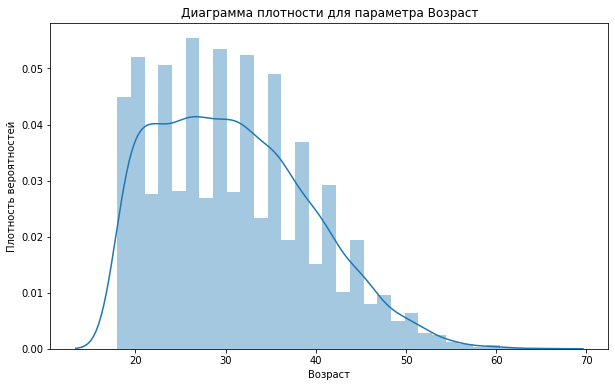

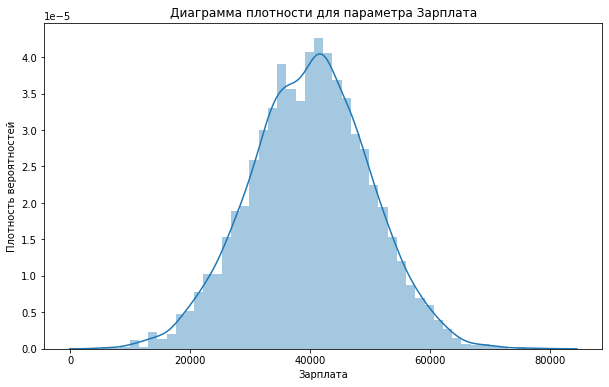

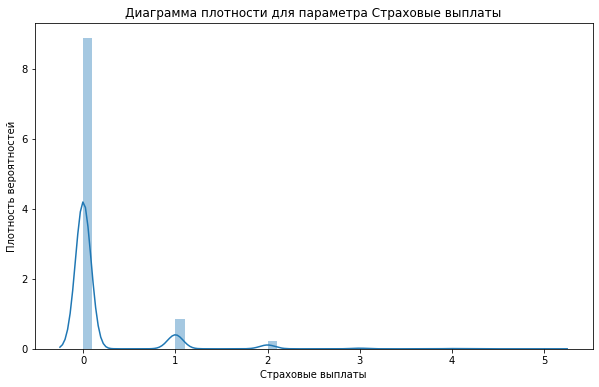

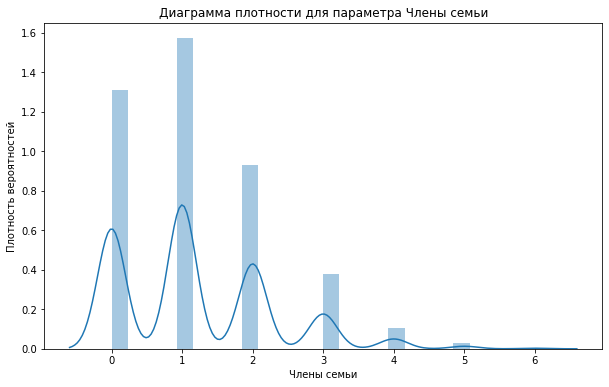

In [8]:
# визуализируем данные:
columns = ['Возраст', 'Зарплата', 'Страховые выплаты', 'Члены семьи']
for col in columns:
    plt.figure(figsize=(10,6))
    sns.distplot(data[col])
    plt.title(f'Диаграмма плотности для параметра {col}')
    plt.ylabel('Плотность вероятностей') 
    plt.show()

### Предобработка данных

In [9]:
# Проверка на пропуски
display(data.isna().sum().to_frame(name="Пропуски").query("Пропуски > 0"))

,Пропуски


In [10]:
# Проверка на дубликаты
data.duplicated().sum()

153

In [11]:
# Удаление дубликатов
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

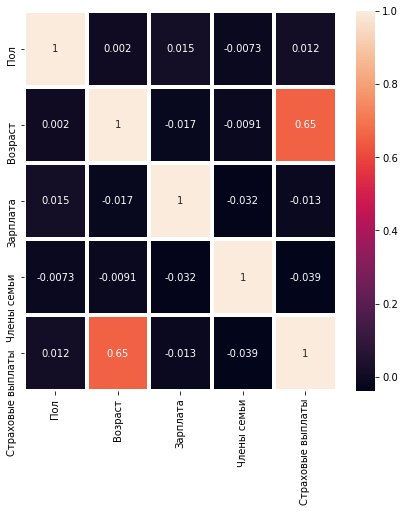

In [12]:
# Проверим на мультиколинеарность
plt.rcParams['figure.figsize'] = (7.0, 7.0)
sns.heatmap(data.corr(), annot=True, linewidths=3, linecolor='white')
plt.show()

### Промежуточный вывод:

Данные успешно загружены и имеют подходящий тип данных. 

Для удобства перевели возраст в целочисленный формат.

В таблице отсутствуют лишние столбцы и пропущенные значения. 

Дубликаты удалены, их происхождение неясно, однако они не являются необходимыми для обучения модели. 

Проверка основных статистических показателей не выявила явных выбросов. 

Наблюдается высокая корреляция между возрастом и зарплатой (коэффициент корреляции 0.65).

## Умножение матриц

**В данном разделе нам предстоит ответить на вопрос и обосновать его решение как изменится качество линейной регрессии при умножениии признаков на обратимую матрицу, прежде, чем предложить алгоритм преобразования данных и запрограммировать его, используя матричные операции.**
 

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw \tag{1}
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y) \tag{2}
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y \tag{3}
$$

**Ответ:** при умножении признаков на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:** У нас есть матрица $X$ размерности $(n, d)$, где $n$ - количество наблюдений, $d$ - количество признаков. 

Пусть $A$ - обратимая матрица размерности $(d, d)$, и мы умножаем матрицу $X$ на эту матрицу $A$, получая матрицу $X'$, т.е. 

$$
X' = XA \tag{4}
$$

Подставим это выражение в формулу для $a'$, согласно формуле $(1)$:

$$
a' = X'w' = (XA)w' = X(Aw') \tag{5}
$$

Подставим $X' = XA$ в формулу обучения модели для исходной матрицы $X$ $(3)$:

$$
w' = ((XA)^T XA)^{-1} (XA)^T y = (A^T X^T XA)^{-1} A^T X^T y = (A^{-1} (X^T X)^{-1} (A^T)^{-1}) A^T X^T y = \\ 
= A^{-1} (X^T X)^{-1} (A^T)^{-1} A^T X^T y = A^{-1} (X^T X)^{-1} X^T y = A^{-1} w \tag{6}
$$ 


Подставим получившийся новый вектор весов $w'$, который равен произведению обратной матрицы $A^{-1}$ и исходного вектора весов $w$ в формулу $(5)$:

$$
a' = X(Aw') = XAA^{-1} w = XEw, \tag{7}
$$

где $Е$ - единичная матрица, умножение которой на любую произвольную матрицу, не изменяет ее, т.е. $a' = a$.

**Вывод**: при умножении признаков на обратимую матрицу мы получили исходную формулу предсказаний, следовательно, матричные операции не повлияют на предсказания модели.

## Алгоритм преобразования

**Алгоритм**
В качестве алгоритма преобразования данных предлагается умножение матрицы признаков на произвольную **обратимую** квадратную матрицу, размер которой соответствует количеству признаков.

Алгоритм действий:
1. подготовить обучающие исходные признаки и целевой признак;
2. подготовить матрицу для умножения и проверить ее обратимость;
3. подготовить обучающие признаки после умножения.
4. обучить модель с помощью алгоритма линейной регрессии для признаков  до умножения на обратимую матрицу;
5. обучить модель с помощью алгоритма линейной регрессии для признаков после умножения на обратимую матрицу;
6. определить предсказания модели до умножения на обратимую матрицу;
7. определить предсказания модели после умножения на обратимую матрицу;
8. вывести для каждого случая метрики r2;
9. сделать выводы о возможности применения предложенного метода преобразования данных;

**Обоснование**
Требование обратимости матрицы является необходимым, для того чтобы иметь возможность восстановить исходные данные. Как было доказано в разделе выше (умножение матриц), ожидается, что матричные операции не повлияют на качество предсказания модели. 

## Проверка алгоритма

В данном разделе нам необходимо подготовить:

 - обучающие исходные признаки и целевой признак,
 - матрицу для умножения,
 - обучающие признаки после умножения.
 
После подготовки признаков проведем:
 - машинное обучение с помощью алгоритма линейной регрессии для признаков как до, так и после умножения,
 - определим в каждом случае предсказания модели,
 - для каждого случая выведем метрики r2.

In [13]:
# Cоздадим признаки для исходного состояния:
features = data.drop(["Страховые выплаты"], axis=1)
target = data["Страховые выплаты"]
features.shape, target.shape

((4847, 4), (4847,))

In [14]:
# Создадим произвольную матрицу
matrix = np.random.randint(100,size = (4, 4))
matrix

array([[10, 62, 93, 10],
       [66, 99, 75, 77],
       [ 7, 44, 45, 15],
       [10, 97, 79, 42]])

In [15]:
# Проверим существование обратимой ей матрицы
matrix_inv = np.linalg.inv(matrix)
matrix_inv

array([[-0.08817657,  0.00541916,  0.4122732 , -0.13618114],
       [-0.1368456 , -0.01664927,  0.53557246, -0.12816993],
       [ 0.09429468,  0.00817419, -0.32318768,  0.07798704],
       [ 0.1596788 ,  0.02178635, -0.72717699,  0.20555519]])

In [28]:
get_rand_matrix()

array([[-0.65660091, -1.49411438, -0.28552007, -1.28023881,  1.00302164],
       [-0.51910638,  0.31519566, -0.18478881, -0.99584833,  1.21593149],
       [-1.38744263,  0.90544088, -1.13537081, -0.51455111,  1.49239292],
       [-0.25395177,  0.71366122, -0.84871249, -1.25079447, -1.57092601],
       [ 1.07049059, -0.06846041, -0.46827579,  2.14649895, -0.43240659]])

In [25]:
# Создадим признаки после умножения
features_matrix = features.dot(matrix)
features_matrix

,0,1,2,3
0,349926.0,2186618.0,2235247.0,747209.0
1,269046.0,1676651.0,1713529.0,573584.0
2,148914.0,926871.0,947175.0,317233.0
3,293306.0,1837073.0,1878233.0,627201.0
4,184558.0,1151234.0,1176693.0,393666.0
...,...,...,...,...
4995,251768.0,1573766.0,1608758.0,537740.0
4996,369054.0,2309063.0,2360629.0,788660.0
4997,238640.0,1493774.0,1527158.0,510124.0
4998,230392.0,1441331.0,1473480.0,492330.0


In [18]:
# обучим модель на исходных данных и выведем метрику r2
model = LinearRegression(normalize=True).fit(features, target)
predictions = model.predict(features)
r2_score_value = r2_score(target, predictions)
print(f"R2_score исходных данных: {r2_score_value:.13f}")

R2_score исходных данных: 0.4302010044852


In [19]:
# обучим модель на преобоазованных  данных и выведем метрику r2
model = LinearRegression(normalize = True).fit(features_matrix, target)
predictions = model.predict(features_matrix)
r2_score_value = r2_score(target, predictions)
print(f"R2_score преобразованных данных: {r2_score_value:.13f}")

R2_score преобразованных данных: 0.4302010044852


## Выводы

В данном проекте был предложен алгоритм преобразования данных с целью защиты персональной информации клиентов страховой компании «Хоть потоп».

В работе был использован набор данных, которые находится в файле /datasets/insurance.csv, где пол, возраст и зарплата застрахованного, количество членов его семьи - это **Признаки**, а количество страховых выплат клиенту за последние 5 лет - **Целевой признак**. Данные были загружены и изучены, удалены дубликаты. 

В качестве алгоритма предложено шифрование данных методом умножения матрицы признаков на произвольную обратимую квадратную матрицу. Приведено теоретическое обоснование данного алгоритма, в основе которого лежит доказанное утверждение что при $X' = XA$, где $X$ - исходная матрица размерности $(n, d)$, а $A$ - обратимая матрица размерности $(d, d)$, прогнозы будут равны $a = a'$. 

Были обучены модели линейной регрессии на признаках до преобразования и после. 

Получены метрики $r2$, которые как и ожидалось, равны, следовательно, предложенный алгоритм можно успешно применять для защиты персональных данных.